In [1]:
import pandas
import matplotlib
#import seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pandas.read_csv('orders_train.txt',sep = ';')
data.head()

orderID   orderDate articleID  colorCode sizeCode  productGroup  quantity  \
0  a1000001  2014-01-01  i1000382       1972       44           3.0         1   
1  a1000001  2014-01-01  i1000550       3854       44           3.0         1   
2  a1000002  2014-01-01  i1001991       2974       38           8.0         1   
3  a1000002  2014-01-01  i1001999       1992       38           8.0         1   
4  a1000003  2014-01-01  i1001942       1968       42           8.0         1   

   price    rrp voucherID  voucherAmount customerID  deviceID paymentMethod  \
0  10.00  29.99         0            0.0   c1010575         2          BPRG   
1  20.00  39.99         0            0.0   c1010575         2          BPRG   
2  35.00  49.99         0            0.0   c1045905         4          BPRG   
3  49.99  49.99         0            0.0   c1045905         4          BPRG   
4  10.00  35.99         0            0.0   c1089295         2      PAYPALVC   

   returnQuantity  
0               0  
1               0  
2               0  
3               1  
4               0

### Total return quantities

-> only 0 and 1 significant

returnQuantity
0    1117156
1    1204005
2       3749
3        192
4         35
5         28
dtype: int64


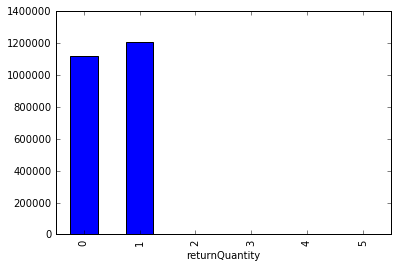

In [7]:
d = data
d = d.groupby('returnQuantity').size()
print(d)
d.plot(kind='bar')

### Product groups analysis

<ul>
<li>Total products from each product group</li>
<li>Return quantities per product group</li>
<li>Return quantities as share of the total products in each group</li>
</ul>

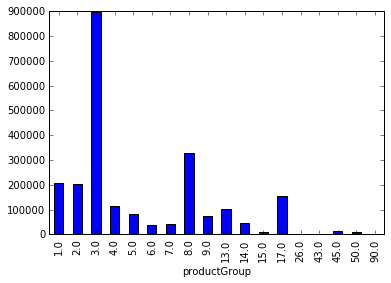

In [22]:
productGroups = data.groupby('productGroup').size()
productGroups.plot(kind = 'bar')

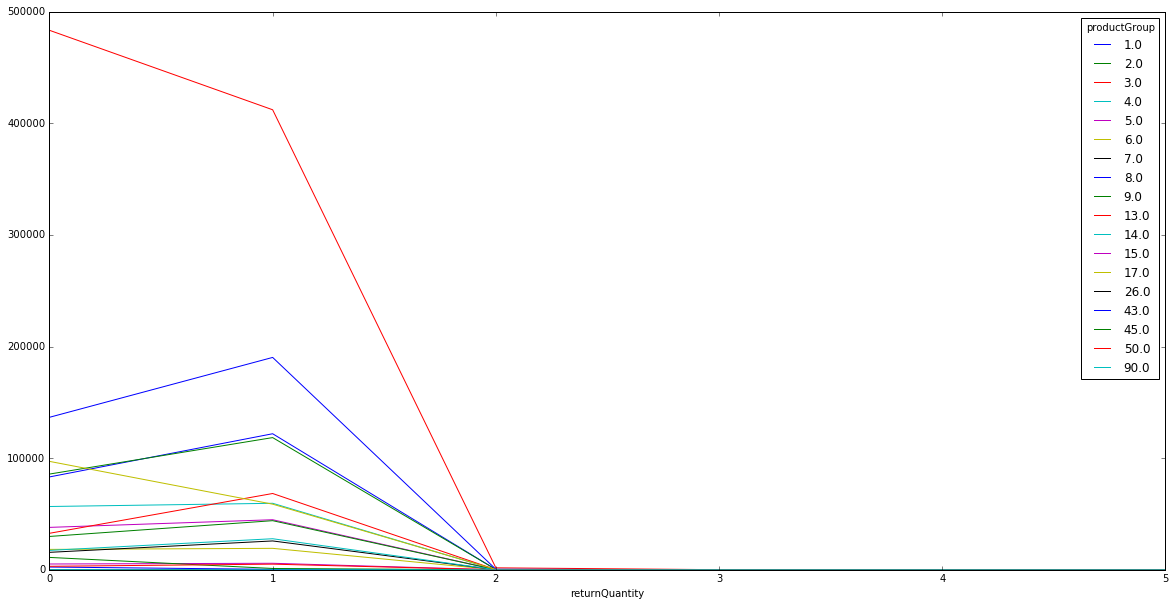

In [39]:
d = data.groupby(['productGroup', 'returnQuantity']).size()
d = d.unstack('productGroup').fillna(0)
d.plot(figsize=(20,10))

In [41]:
d/productGroups

productGroup        1.0       2.0       3.0       4.0       5.0       6.0   \
returnQuantity                                                               
0               0.405132  0.419241  0.538601  0.487008  0.458043  0.486887   
1               0.593564  0.578984  0.459264  0.511747  0.540716  0.511915   
2               0.001261  0.001691  0.001965  0.001159  0.001181  0.001198   
3               0.000039  0.000068  0.000123  0.000069  0.000060  0.000000   
4               0.000005  0.000010  0.000022  0.000009  0.000000  0.000000   
5               0.000000  0.000005  0.000025  0.000009  0.000000  0.000000   

productGroup        7.0       8.0       9.0       13.0      14.0      15.0  \
returnQuantity                                                               
0               0.376775  0.417283  0.403860  0.323167  0.384029  0.470381   
1               0.622454  0.581114  0.594991  0.675569  0.614778  0.529257   
2               0.000722  0.001539  0.001095  0.001225  0.001126  0.000362   
3               0.000048  0.000040  0.000041  0.000040  0.000066  0.000000   
4               0.000000  0.000018  0.000000  0.000000  0.000000  0.000000   
5               0.000000  0.000006  0.000014  0.000000  0.000000  0.000000   

productGroup        17.0  26.0      43.0      45.0      50.0      90.0  
returnQuantity                                                          
0               0.621620   1.0  0.859473  0.903108  0.382235  0.806452  
1               0.376275   0.0  0.140527  0.096892  0.616912  0.193548  
2               0.001926   0.0  0.000000  0.000000  0.000853  0.000000  
3               0.000141   0.0  0.000000  0.000000  0.000000  0.000000  
4               0.000032   0.0  0.000000  0.000000  0.000000  0.000000  
5               0.000006   0.0  0.000000  0.000000  0.000000  0.000000

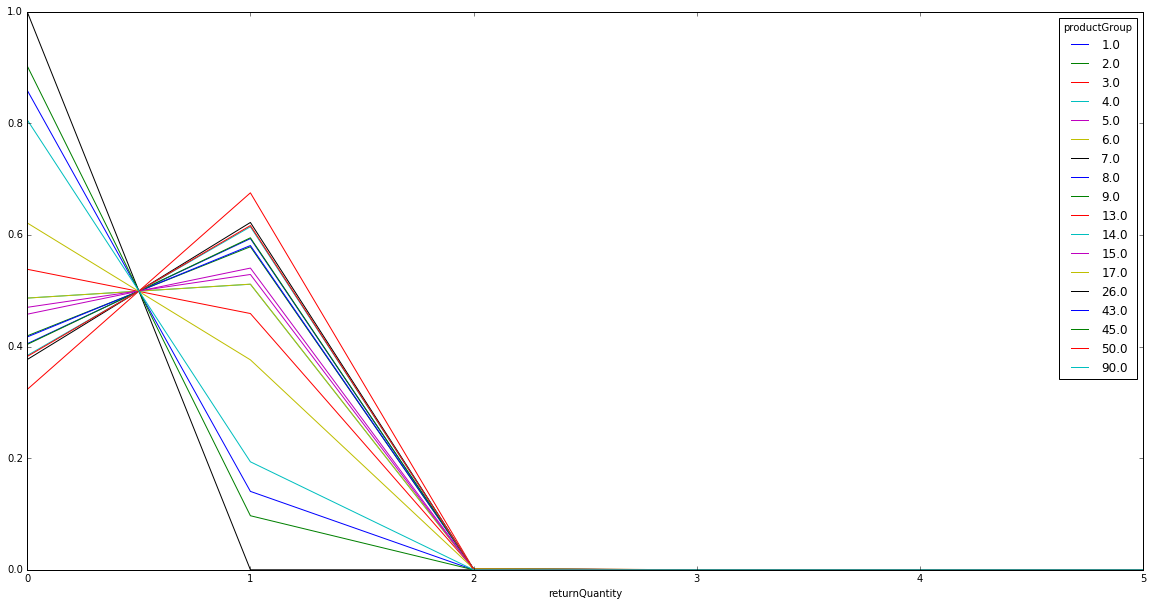

In [38]:
(d/productGroups).plot(figsize=(20,10))

### Customer analysis

In [80]:
c = data.groupby('customerID').size().sort_values()
totalCustomers = len(c)
totalCustomers

311369

--> 311 369 unique customers

<ul>
<li>x axis - number of transactions in database</li> 
<li>y axis - number of customers</li> 
</ul>

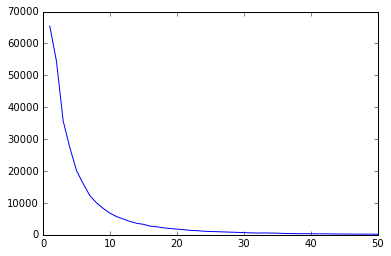

In [81]:
c = c.groupby(c).size()
c.plot(xlim=(0,50))

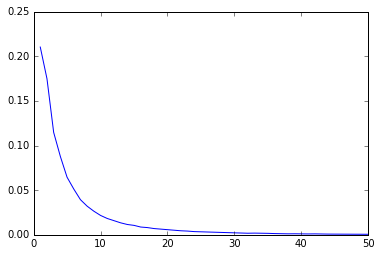

In [84]:
(c/totalCustomers).plot(xlim=(0,50))